In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

rand = random.Random()

In [3]:
x=np.linspace(np.pi/16, np.pi*15/16, 9)
def createDistribution(sigma):
    return np.exp(-(x-np.pi)**2/(2*sigma**2))

In [4]:
def getSigma(y):
    
    return np.sqrt(np.sum(y*(x-np.pi)**2)/sum(y))

In [5]:
def getSystUncorrelatedEff(sigma1=1, b_inj = 0.6, deff = 0.20):
    
    sigma2=np.hypot(sigma1, b_inj)
    y1 = createDistribution(sigma1)
    y2 = createDistribution(sigma2)
    b = np.sqrt(getSigma(y2)**2-getSigma(y1)**2)
    #print(getSigma(y1), getSigma(y2), broadening)

    #plt.plot(x, y1)
    #plt.plot(x, y2)

    vals_b=[]
    vals_s1=[]
    for i in range(1000):
        eff = [rand.gauss(1, deff) for i in range(len(y1))]
        y1e = eff*y1
        y2e = eff*y2
        s1 =getSigma(y1e)
        s2 =getSigma(y2e)
        vals_b.append(np.sqrt(abs(s2**2-s1**2))*np.sign(s2-s1))
        vals_s1.append(s1)
    b_syst=np.sqrt(np.sum((vals_b-b)**2)/len(vals_b))
    
    s1=getSigma(y1)
    s1_syst=np.sqrt(np.sum((vals_s1-s1)**2)/len(vals_s1))
    return b, b_syst, s1,s1_syst

broadening, syst,sigma1, sigma1_syst=getSystUncorrelatedEff(sigma1=1, b_inj = 0.6, deff = 0.062)
print(broadening,syst,sigma1, sigma1_syst)

0.5478886816991239 0.007475170231679073 1.0006081544529468 0.011880995801154027


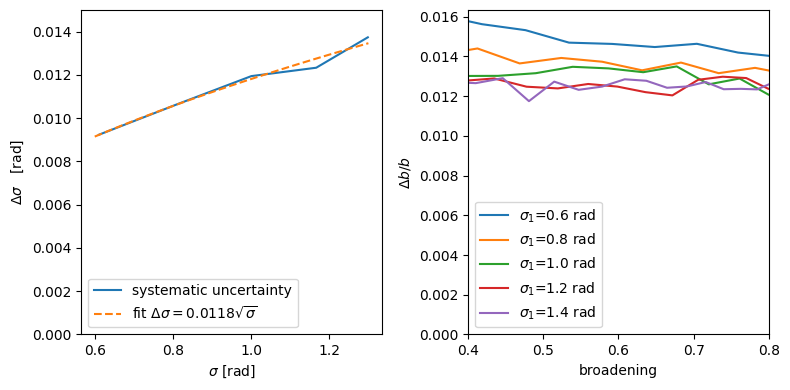

In [15]:
fig,axs=plt.subplots(1,2, figsize=(8,4))

plt.sca(axs[0])

sigma1_values=np.linspace(.6, 1.4, 5)
s1_values=[]
s1_syst_values=[]
thesum=0
for sigma1 in sigma1_values:
    b_inj=0
    broadening, syst,s1,s1_syst = getSystUncorrelatedEff(sigma1=sigma1, b_inj=b_inj, deff=0.062)
    s1_values.append(s1)
    s1_syst_values.append(s1_syst)
    thesum+=s1_syst/np.sqrt(s1)
fit = thesum/len(sigma1_values)
plt.plot(s1_values, s1_syst_values, label= "systematic uncertainty")
xx=np.linspace(.6, 1.3, 21)
plt.plot(xx, fit*np.sqrt(xx),linestyle='--',label= f"fit $\Delta\\sigma={fit:.4f}\sqrt{{\sigma}}$")

plt.xlabel("$\\sigma$ [rad]")
plt.ylabel("$\Delta \\sigma$   [rad]")
plt.ylim(0, 0.015)

plt.legend()

plt.sca(axs[1])
sigma1_values=np.linspace(.6, 1.4, 5)

for sigma1 in sigma1_values:
    syst_values=[]
    b_values=[]
    for b_inj in np.linspace(0.3, 1.4, 20):
        broadening, syst,s1,s1_syst = getSystUncorrelatedEff(sigma1=sigma1, b_inj=b_inj, deff=0.062)
        syst_values.append(syst/broadening)
        b_values.append(broadening)
    plt.plot(b_values, syst_values, label=f'$\\sigma_1$={sigma1:.1f} rad')
plt.ylabel("$\Delta b/b$")
plt.xlabel("broadening")
plt.xlim(0.4, 0.8)
plt.ylim(0)
plt.legend()
plt.tight_layout()
plt.savefig("syst_efficiency_width_broadening.pdf")
plt.show()

In [20]:
def getSystCorrelatedEff(sigma1=1, b_inj = 0.6, deff = 0.06):
    
    sigma2=np.hypot(sigma1, b_inj)
    y1 = createDistribution(sigma1)
    y2 = createDistribution(sigma2)
    broadening= np.sqrt(getSigma(y2)**2-getSigma(y1)**2)
    #print(getSigma(y1), getSigma(y2), broadening)

    #plt.plot(x, y1)
    #plt.plot(x, y2)

    vals=[]
    for i in range(1000):
        eff_moment = rand.gauss(0, deff)
        eff = 1+np.cos(x)*eff_moment
        y1e = eff*y1
        y2e = eff*y2
        s1 =getSigma(y1e)
        s2 =getSigma(y2e)
        vals.append(np.sqrt(abs(s2**2-s1**2))*np.sign(s2-s1))
    syst=np.sqrt(np.sum((vals-broadening)**2)/len(vals))
    return broadening, syst

broadening,syst=getSystCorrelatedEff(sigma1=1, b_inj = 0.6, deff = 0.20)
print(broadening,syst)

0.5478886816991239 0.044726634584466435


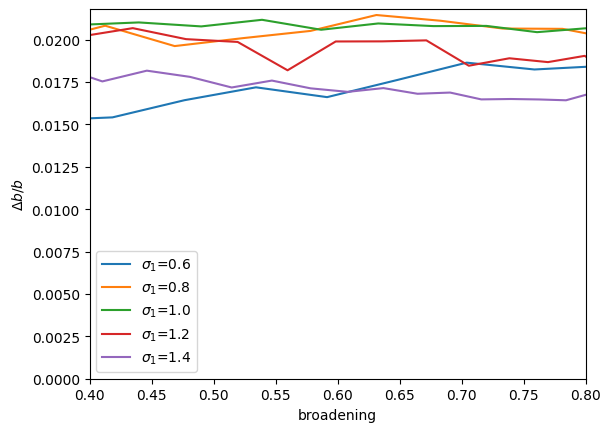

In [22]:
sigma1_values=np.linspace(.6, 1.4, 5)

for sigma1 in sigma1_values:
    syst_values=[]
    b_values=[]
    for b_inj in np.linspace(0.3, 1.4, 20):
        broadening, syst = getSystCorrelatedEff(sigma1=sigma1, b_inj=b_inj, deff=0.05)
        syst_values.append(syst/broadening)
        b_values.append(broadening)
    plt.plot(b_values, syst_values, label=f'$\\sigma_1$={sigma1:.1f}')
plt.ylabel("$\Delta b/b$")
plt.xlabel("broadening")
plt.xlim(0.4, 0.8)
plt.ylim(0)
plt.legend()
plt.show()